<a href="https://colab.research.google.com/github/ricospeloacaso/python_para_investimentos/blob/master/03_CORRELA%C3%87%C3%83O_entre_D%C3%93LAR_e_IBOVESPA_Python_para_Investimentos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Ricos pelo Acaso



Link para o vídeo: https://youtu.be/zjaGIcUb6Ek

# 1. Importando bibliotecas

In [0]:
!pip install yfinance --upgrade --no-cache-dir
import yfinance as yf

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 2. Obtendo e tratando os dados

In [29]:
tickers = "^BVSP USDBRL=X"
carteira = yf.download(tickers, start="2007-01-01")["Close"]

[*********************100%***********************]  2 of 2 completed


In [14]:
carteira

,USDBRL=X,^BVSP
Date,,
2007-01-01,2.1325,NaN
2007-01-02,2.1310,45383.0
2007-01-03,2.1345,44445.0
2007-01-04,2.1390,44020.0
2007-01-05,2.1470,42245.0
...,...,...
2020-04-27,5.5726,78239.0
2020-04-28,5.6526,81312.0
2020-04-29,5.4974,83171.0


In [15]:
carteira = carteira.dropna()
carteira

,USDBRL=X,^BVSP
Date,,
2007-01-02,2.1310,45383.0
2007-01-03,2.1345,44445.0
2007-01-04,2.1390,44020.0
2007-01-05,2.1470,42245.0
2007-01-08,2.1465,42830.0
...,...,...
2020-04-24,5.5331,75331.0
2020-04-27,5.5726,78239.0
2020-04-28,5.6526,81312.0


In [16]:
carteira.columns = ["DOLAR", "IBOV"]
carteira

,DOLAR,IBOV
Date,,
2007-01-02,2.1310,45383.0
2007-01-03,2.1345,44445.0
2007-01-04,2.1390,44020.0
2007-01-05,2.1470,42245.0
2007-01-08,2.1465,42830.0
...,...,...
2020-04-24,5.5331,75331.0
2020-04-27,5.5726,78239.0
2020-04-28,5.6526,81312.0


# 3. Resultados

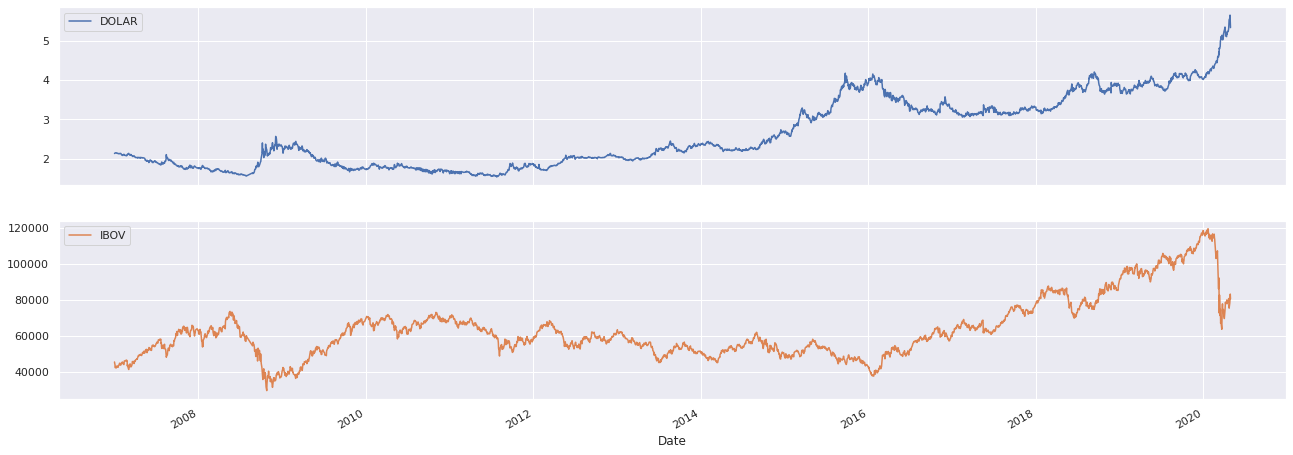

In [17]:
sns.set()
carteira.plot(subplots=True, figsize=(22,8));

In [18]:
retornos = carteira.pct_change()[1:]
retornos

,DOLAR,IBOV
Date,,
2007-01-03,0.001642,-0.020669
2007-01-04,0.002108,-0.009562
2007-01-05,0.003740,-0.040323
2007-01-08,-0.000233,0.013848
2007-01-09,0.001165,-0.019216
...,...,...
2020-04-24,0.013964,-0.054498
2020-04-27,0.007139,0.038603
2020-04-28,0.014356,0.039277


In [27]:
retornos.describe()

,DOLAR,IBOV
count,3261.000000,3261.000000
mean,0.000354,0.000344
std,0.012094,0.018310
min,-0.104792,-0.147797
25%,-0.005771,-0.008456
50%,0.000058,0.000680
75%,0.006285,0.009604
max,0.101524,0.146560


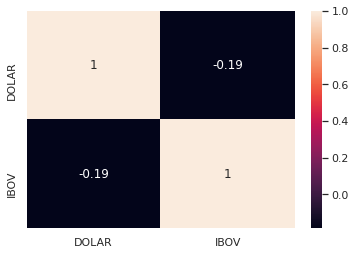

In [28]:
sns.heatmap(retornos.corr(), annot=True);

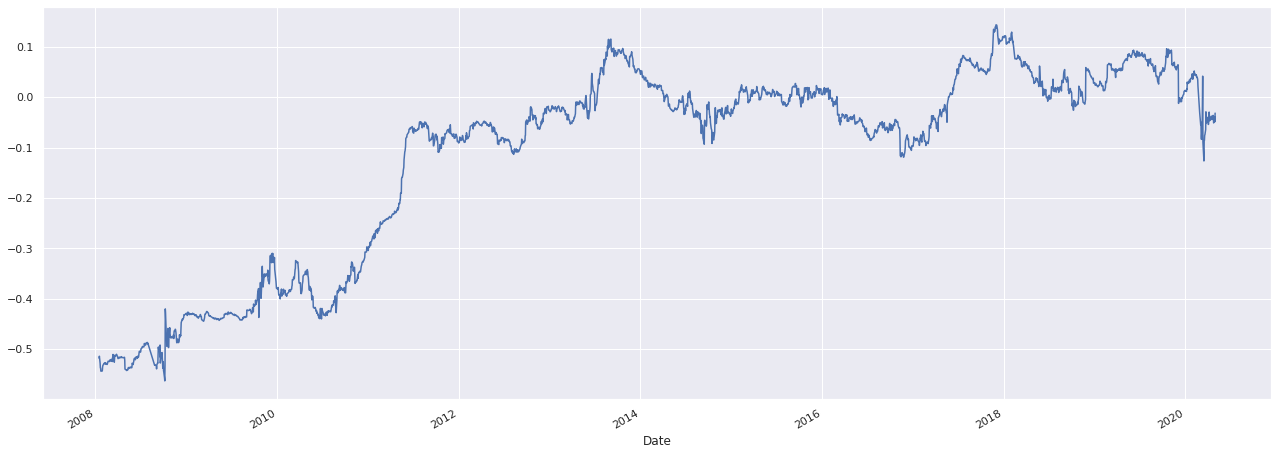

In [20]:
retornos["DOLAR"].rolling(252).corr(retornos["IBOV"]).plot(figsize=(22,8))

In [25]:
carteira["IBOV_DOLARIZADO"] = (carteira["IBOV"] / carteira["DOLAR"])
carteira

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,DOLAR,IBOV,IBOV_DOLARIZADO
Date,,,
2007-01-02,2.1310,45383.0,21296.573959
2007-01-03,2.1345,44445.0,20822.206345
2007-01-04,2.1390,44020.0,20579.710732
2007-01-05,2.1470,42245.0,19676.291819
2007-01-08,2.1465,42830.0,19953.411504
...,...,...,...
2020-04-24,5.5331,75331.0,13614.609939
2020-04-27,5.5726,78239.0,14039.945730
2020-04-28,5.6526,81312.0,14384.885311


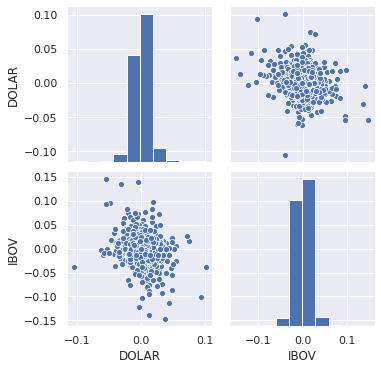

In [26]:
sns.pairplot(retornos);